In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.io as sio
from scipy import signal
import copy
from scipy.interpolate import griddata


---
# VIDEO: Local maxima and minima
---

For local minimma you can just look at the min point in a window. Very simple.

To find all local minima, there is an interesting deeivative method that doesn't walk on the signal but do the entire signal in the same time!!

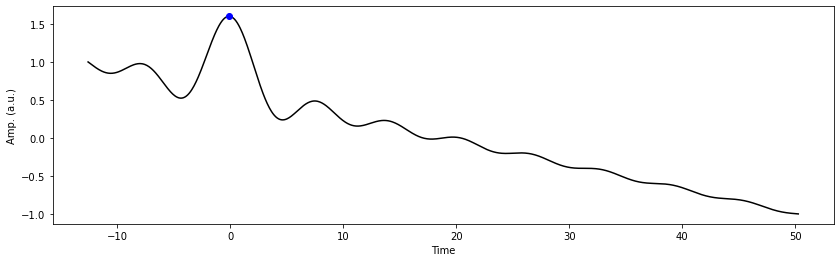

In [2]:
# signal is sinc plus linear trend
time    = np.linspace(-4*np.pi,16*np.pi,1000)
signal1 = np.sin(time)/time + np.linspace(1,-1,len(time))



# find global maximum
maxval = np.max(signal1)
maxidx = np.argmax(signal1)


plt.figure(figsize=(14,4))
# plot the signal and its maximum
plt.plot(time,signal1,'k')
plt.xlabel('Time')
plt.ylabel('Amp. (a.u.)')
plt.plot(time[maxidx],maxval,'bo')
plt.show()

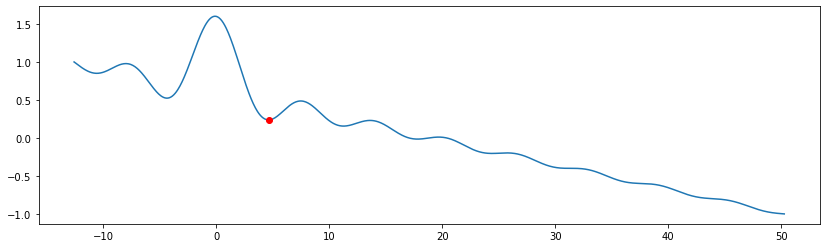

In [3]:
## "hack" method for local extrema

# "local" minimum is the "global" minimum in a restricted range
range4max = [0,5]
rangeidx = [ np.argmin((time-x)**2) for x in range4max ]

maxLval = np.min( signal1[range(rangeidx[0],rangeidx[1])] )
maxLidx = np.argmin( signal1[range(rangeidx[0],rangeidx[1])] )


plt.figure(figsize=(14,4))
# plot it
plt.plot(time,signal1)
plt.plot(time[maxLidx+rangeidx[0]],maxLval,'ro')
plt.show()

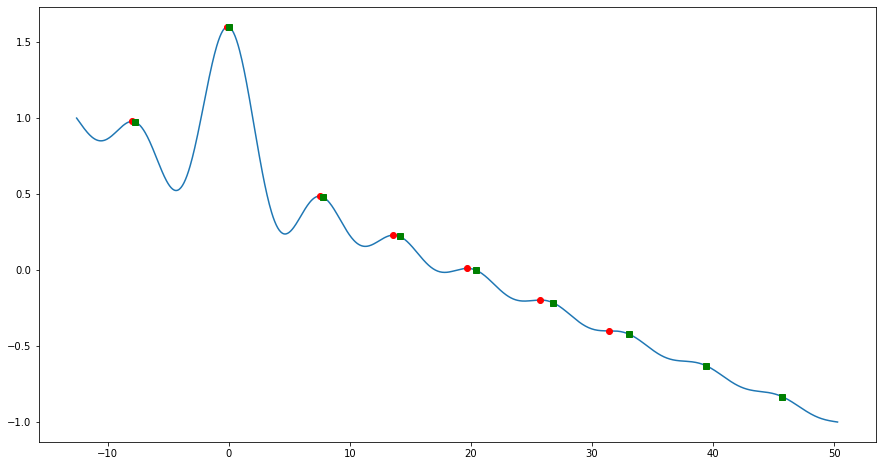

In [4]:
## local minima/maxima

# find local maxima and plot
# Method with derivative. Find maxima, when slope goes from positive to negative
peeks1 = np.squeeze( np.where( np.diff(np.sign(np.diff(signal1))) <0) )+1
# Here is diff in sign works:
# diff [-1, -1] = 0
# diff [-1, 1] = 2  if >0 this is a local minima
# diff [1, -1] = -2 if <0 this is a local maxima
# diff [1, 1] = 0


plt.figure(figsize=(15,8))
plt.plot(time,signal1)
plt.plot(time[peeks1],signal1[peeks1],'ro')

# try again using detrended signal
peeks2 = np.squeeze( np.where(np.diff(np.sign(np.diff( scipy.signal.detrend(signal1) )))<0) )+1
plt.plot(time[peeks2],signal1[peeks2],'gs')

plt.show()

In [25]:
np.sign(np.diff(signal1))

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

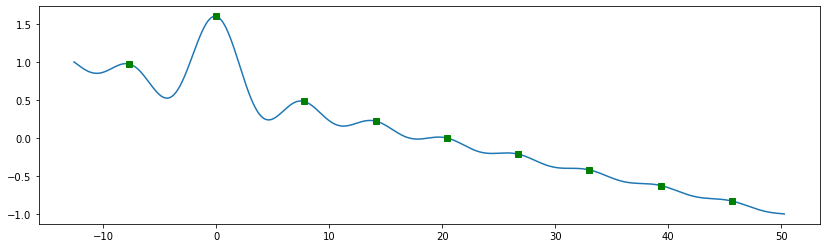

In [12]:
# try again using detrended signal
plt.figure(figsize=(14,4))
peeks2 = np.squeeze( np.where(np.diff(np.sign(np.diff( scipy.signal.detrend(signal1) )))<0) )+1
plt.plot(time,signal1)
plt.plot(time[peeks2],signal1[peeks2],'gs')

plt.show()

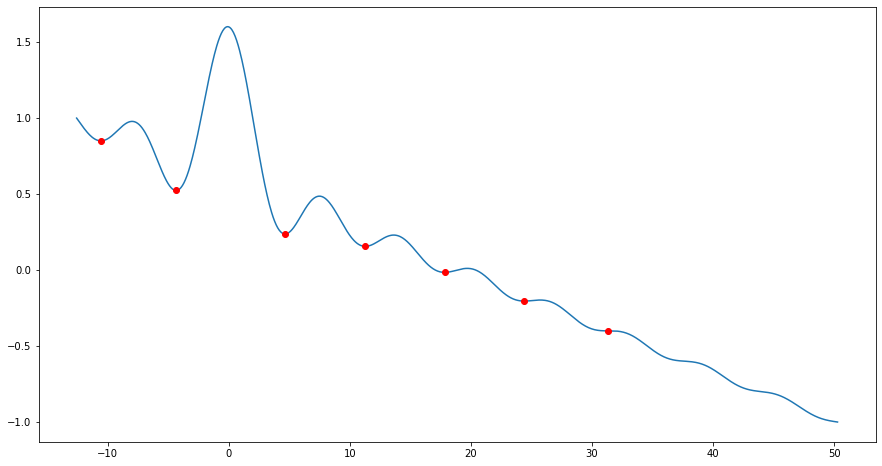

In [32]:
# Inverse >0 to find local minima
peeks1 = np.squeeze( np.where( np.diff(np.sign(np.diff(signal1))) >0) )+1

plt.figure(figsize=(15,8))
plt.plot(time,signal1)
plt.plot(time[peeks1],signal1[peeks1],'ro')

# VIDEO: Recover signal from noise amplitude

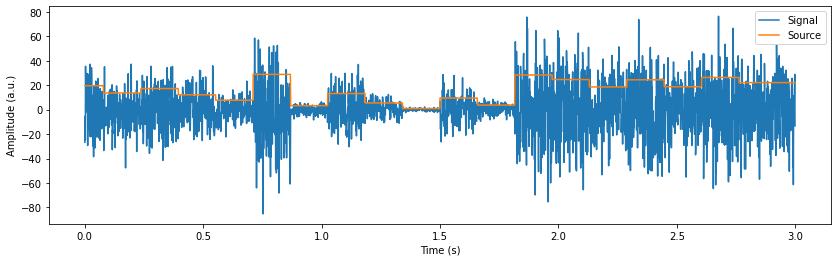

In [8]:
## create the signal

# create signal
srate = 1000 # Hz
time  = np.arange(0,3,1/srate)
n     = len(time)
p     = 20 # poles for random interpolation

# amplitude modulator and noise level
ampmod = griddata(np.arange(0,p), np.random.rand(p)*30, np.linspace(1,p,n), method='nearest')

signal1 = ampmod * np.random.randn(n)

# plot
plt.figure(figsize=(14,4))
plt.plot(time,signal1,label='Signal')
plt.plot(time,ampmod,label='Source')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.legend()
plt.show()

In [16]:
np.ones(k)/k

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

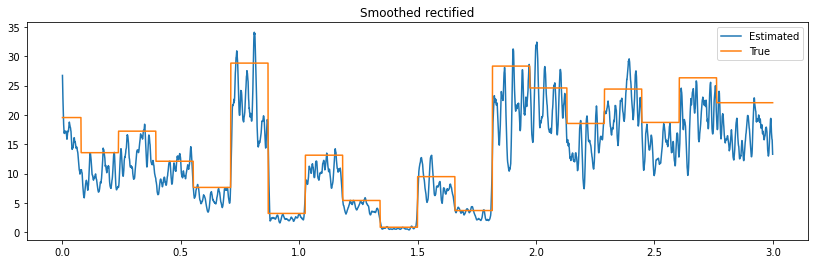

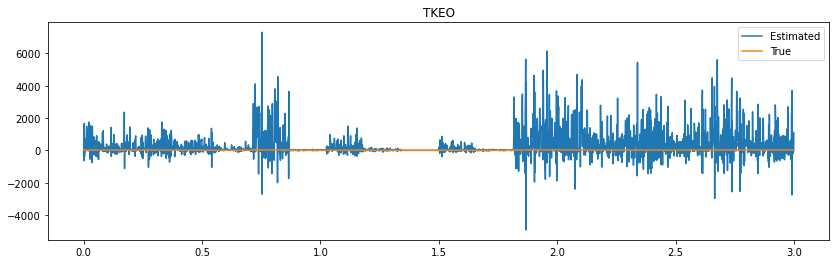

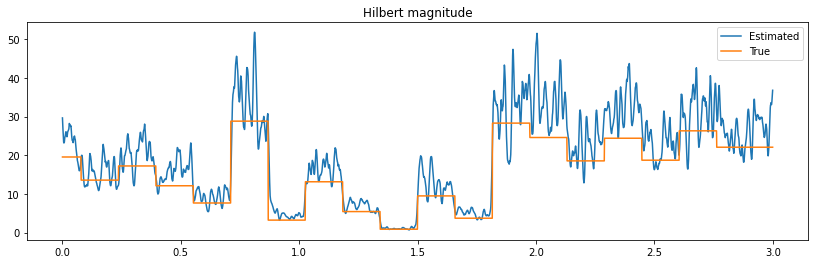

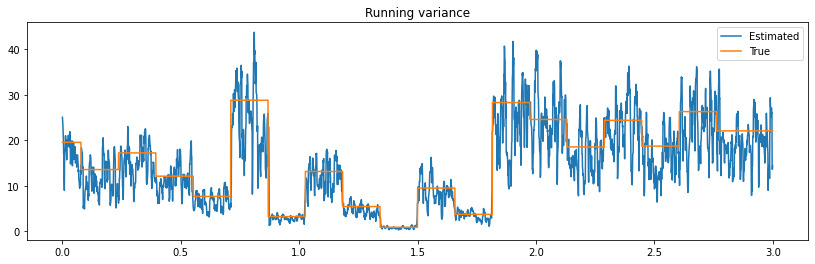

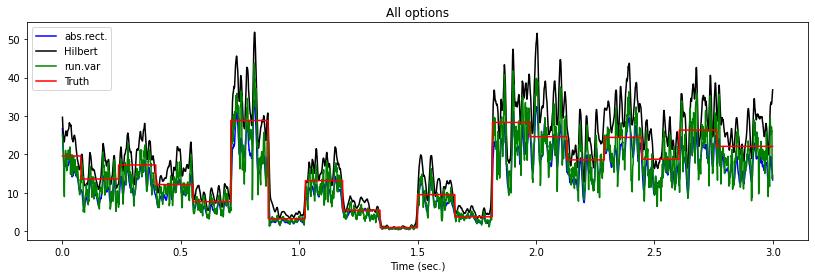

In [20]:
## options for identifying the original signal


# rectify and lowpass filter (running mean window)
rectsig = np.abs(signal1)
k = 9
# below it's using a filter but it's actually doing like a running mean filter of size 9
rectsig = signal.filtfilt(np.ones(k)/k,1,rectsig)
plt.figure(figsize=(14,4))
plt.plot(time,rectsig,label='Estimated')
plt.plot(time,ampmod,label='True')
plt.legend()
plt.title('Smoothed rectified')
plt.show()


# TKEO (multiplication of previous points and fiollowing points)
tkeosig = copy.deepcopy( signal1 )
tkeosig[1:-1] = signal1[1:-1]**2 - signal1[0:-2]*signal1[2:]
plt.figure(figsize=(14,4))
plt.plot(time,tkeosig,label='Estimated')
plt.plot(time,ampmod,label='True')
plt.legend()
plt.title('TKEO')
plt.show()


# magnitude of Hilbert transform
maghilb = np.abs(scipy.signal.hilbert( signal1 ))

# running mean-filter
k = 9
maghilb = signal.filtfilt(np.ones(k)/k,1,maghilb)
plt.figure(figsize=(14,4))
plt.plot(time,maghilb,label='Estimated')
plt.plot(time,ampmod,label='True')
plt.legend()
plt.title('Hilbert magnitude')
plt.show()


# running-variance (compute sdt of a running window)
k = 9 #19
runningVar = np.zeros(n)
for i in range(0,n):
    startp = np.max((0,i-int(k/2)))
    endp   = np.min((int(k/2)+i,n))
    
    runningVar[i] = np.std( signal1[range(startp,endp)] )


plt.figure(figsize=(14,4))
plt.plot(time,runningVar,label='Estimated')
plt.plot(time,ampmod,label='True')
plt.legend()
plt.title('Running variance')
plt.plot()
plt.show


### plot all options
plt.figure(figsize=(14,4))
plt.plot(time,rectsig,'b',label='abs.rect.')
#plt.plot(time,tkeosig,'m',label='TKEO')
plt.plot(time,maghilb,'k',label='Hilbert')
plt.plot(time,runningVar,'g',label='run.var')
plt.plot(time,ampmod,'r',label='Truth')

plt.title('All options')
plt.legend()
plt.xlabel('Time (sec.)')
plt.show()

[[1.         0.91609803]
 [0.91609803 1.        ]]


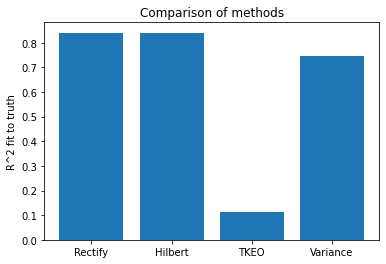

In [22]:
## compare the different algorithms to ground truth

# rectify
r2rect = np.corrcoef(ampmod,rectsig)
print(r2rect)
r2rect = r2rect[0,1]**2

# TKEO
r2tkeo = np.corrcoef(ampmod,tkeosig)
r2tkeo = r2tkeo[0,1]**2

# Hilbert
r2hilb = np.corrcoef(ampmod,maghilb)
r2hilb = r2hilb[0,1]**2

# running variance
r2varr = np.corrcoef(ampmod,runningVar)
r2varr = r2varr[0,1]**2


# now plot
plt.bar(np.arange(1,5),[ r2rect, r2hilb, r2tkeo, r2varr ])
plt.xticks([1,2,3,4],('Rectify','Hilbert','TKEO','Variance'))
plt.ylabel('R^2 fit to truth')
plt.title('Comparison of methods')

# optional zoom
#plt.ylim([.8, .9])

plt.show()


---
# VIDEO: Wavelet convolution for feature extraction
---

In this exercice we know that an event occure in the data

We want to find out when this event happens (at which onsets)

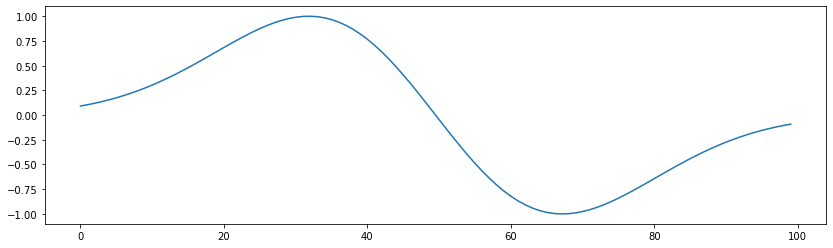

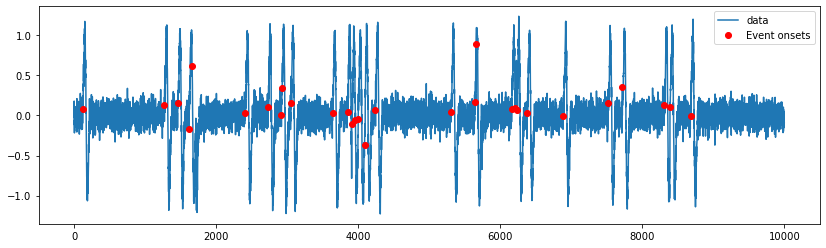

In [57]:
## simulate data 
# taken from video "Averaging multiple repetitions (time-synchronous averaging)"

# total number of time points
N = 10000

# create event (derivative of Gaussian)
k = 100 # duration of event in time points
event = np.diff(np.exp( -np.linspace(-2,2,k+1)**2 ))
event = event/np.max(event) # normalize to max=1
plt.figure(figsize=(14,4))
plt.plot(event,label='event')

# event onset times
Nevents = 30
onsettimes = np.random.permutation( int(N/10-k) )
onsettimes = onsettimes[range(0,Nevents)]*10

# put event into data
data = np.zeros(N)
for ei in range(0,Nevents):
    data[range(onsettimes[ei],onsettimes[ei]+k)] = event

# add noise
data = data + 0.1*np.random.randn(N)



# plot data
plt.figure(figsize=(14,4))
plt.plot(data,label='data')
plt.plot(onsettimes,data[onsettimes],'ro',label='Event onsets')
plt.legend()
plt.show()

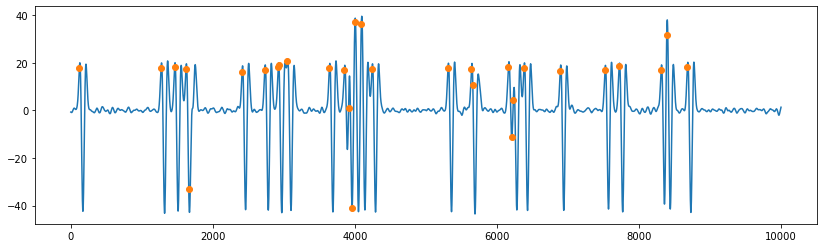

In [58]:
## convolve with event (as template)

# We KNOW what is the event so we can convolve it to the data to extract it kind of
# convolution
convres = scipy.signal.convolve(data,event,'same')


# plot the convolution result and ground-truth event onsets
plt.figure(figsize=(14,4))
plt.plot(convres)
plt.plot(onsettimes,convres[onsettimes],'o')
plt.show()

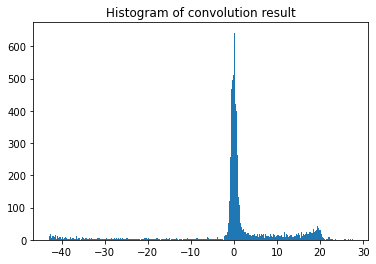

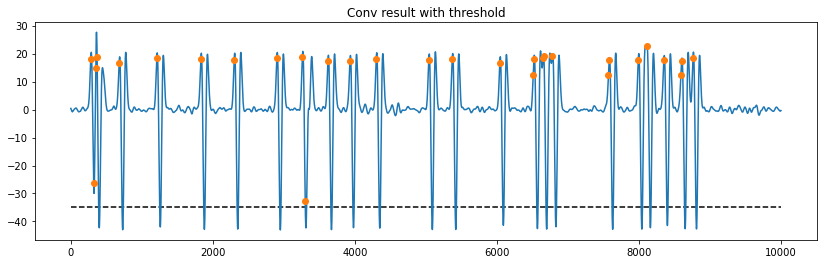

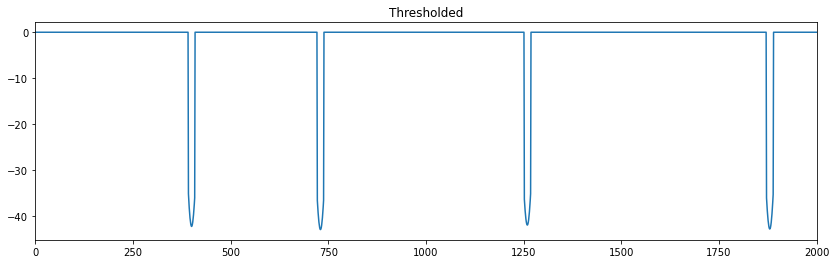

nb of local min 22


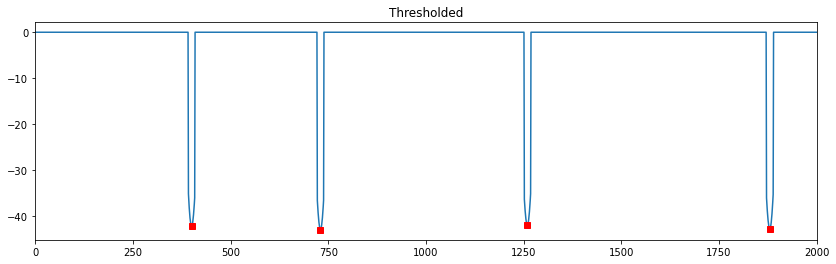

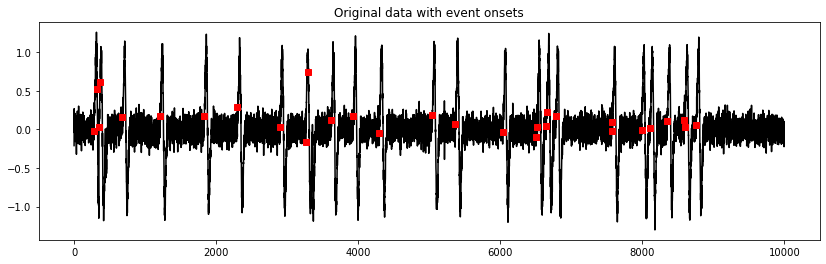

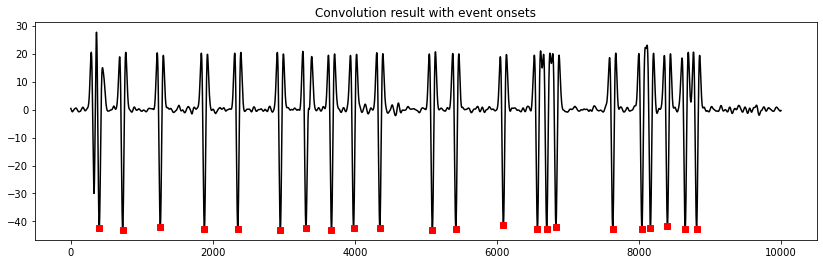

In [54]:
## find a threshold

#% histogram of all data values
# we want to find the negative peak value that happens at each event occurence in convres
plt.hist(convres,int(N/20))
plt.title('Histogram of convolution result')
plt.show()


# pick a threshold based on histogram and visual inspection
thresh = -35


# plot the threshold
plt.figure(figsize=(14,4))
plt.plot([0,N],[thresh,thresh],'k--')
plt.plot(convres)
plt.plot(onsettimes,convres[onsettimes],'o')
plt.title('Conv result with threshold')
plt.show()


# find local minima
thresh_ts = copy.deepcopy( convres )
thresh_ts[thresh_ts>thresh] = 0


# let's see what it looks like...
plt.figure(figsize=(14,4))
plt.plot(thresh_ts)
plt.title('Thresholded')
plt.xlim([0,2000])
plt.show()

# find local minima of the thresholded signal
localmin = np.squeeze( np.where(np.diff(np.sign(np.diff(thresh_ts)))>0) )+1
print("nb of local min", len(localmin))
# let's see what it looks like...
plt.figure(figsize=(14,4))
plt.plot(thresh_ts)
plt.plot(localmin,thresh_ts[localmin],'rs')
plt.title('Thresholded')
plt.xlim([0,2000])
plt.show()

# plot original data
plt.figure(figsize=(14,4))
plt.plot(data,'k')
plt.plot(onsettimes,data[onsettimes],'rs')
plt.title('Original data with event onsets')
plt.show()

# plot convolution result
plt.figure(figsize=(14,4))
plt.plot(convres,'k')
plt.plot(localmin,convres[localmin],'rs')
plt.title('Convolution result with event onsets')
plt.show()

In [41]:
len(localmin)

46

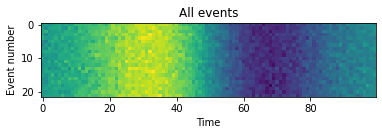

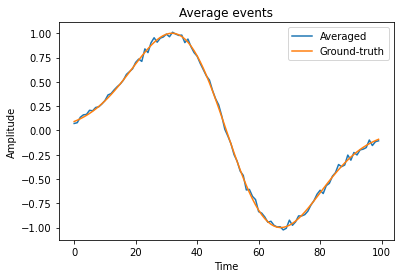

In [52]:
## now extract time series for windowing

# remove local minima that are too close to the edges
localmin = np.delete(localmin,np.where(localmin<k//2))
localmin = np.delete(localmin,np.where(localmin>(N-k//2)))


# initialize data matrix
datamatrix = np.zeros((len(localmin),k))

# enter data snippets into matrix
# extract the signal around the event found by local minima technique
# k being the size of the event that we know.
for ei in range(0,len(localmin)):
    datamatrix[ei,:] = data[ range(localmin[ei]-int(k/2),localmin[ei]+int(k/2)) ]

# show all snippets
plt.imshow(datamatrix)
plt.xlabel('Time')
plt.ylabel('Event number')
plt.title('All events')
plt.show()

# snippet average against ground truth
plt.plot(np.arange(0,k),np.mean(datamatrix,axis=0),label='Averaged')
plt.plot(np.arange(0,k),event,label='Ground-truth')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Average events')
plt.show()



---
# VIDEO: Area under the curve
---


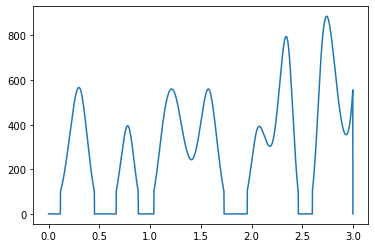

In [8]:
# create signal
srate = 1000 # Hz
time  = np.arange(0,3,1/srate)
n     = len(time)
p     = 20  # poles for random interpolation

# amplitude modulator and noise level
signal1 = griddata(np.arange(0,p), np.random.rand(p)*30, np.linspace(0,p-1,n), method='cubic')**2
signal1[signal1<100] = 0

# force first and last points to be 0
signal1[0]=0
signal1[-1]=0

plt.plot(time,signal1)
plt.show()

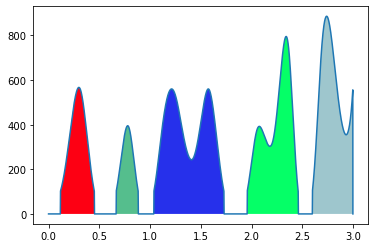

In [10]:
## demarcate each lobe
from matplotlib.patches import Polygon

# thresholded time series
threshts = np.double( signal1>0 )

# find boundaries
dpntsU = np.squeeze(np.where( np.diff(threshts)>0 ) )
dpntsD = np.squeeze(np.where( np.diff(threshts)<0 ) )


plt.figure()
plt.plot(time,signal1)

axes = plt.gca()
for i in range(0,len(dpntsD)):
    
    # create polygon object (xy pair for each row)
    x = []
    for ii in range(dpntsU[i],dpntsD[i]):
        x.append(np.array([time[ii],signal1[ii]]))
    x.append(np.array([time[dpntsD[i]+1],signal1[dpntsD[i]+1]]))
    
    axes.add_patch(Polygon(x,closed=True,facecolor=np.random.rand(3)))


plt.show()


In [11]:
dpntsU

array([ 116,  666, 1037, 1957, 2599], dtype=int64)

In [12]:
dpntsD

array([ 451,  883, 1728, 2460, 2998], dtype=int64)

In [14]:
np.mean(np.diff(time))

0.001

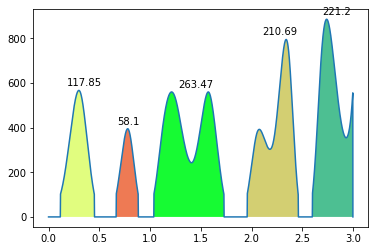

In [13]:
## compute AUC under each curve

auc = np.zeros(len(dpntsU))

for ii in range(0,len(dpntsU)):
    auc[ii] = np.sum( signal1[ range(dpntsU[ii],dpntsD[ii]) ] )

# scale by dt
auc = auc * np.mean(np.diff(time))



### Add text to patches

plt.figure()
plt.plot(time,signal1)

axes = plt.gca()
for i in range(0,len(dpntsD)):
    
    # create polygon object (xy pair for each row)
    x = []
    for ii in range(dpntsU[i],dpntsD[i]):
        x.append(np.array([time[ii],signal1[ii]]))
    x.append(np.array([time[dpntsD[i]+1],signal1[dpntsD[i]+1]]))
    
    axes.add_patch(Polygon(x,closed=True,facecolor=np.random.rand(3)))
    
    # here's the text
    xpoint = (time[dpntsU[i]]+time[dpntsD[i]])/2 - .1
    ypoint = np.max(signal1[range(dpntsU[i],dpntsD[i])])+20
    plt.text(xpoint,ypoint,np.round(auc[i],2))


plt.show()


---
# VIDEO: Detect muscle movements from EMG recordings
---


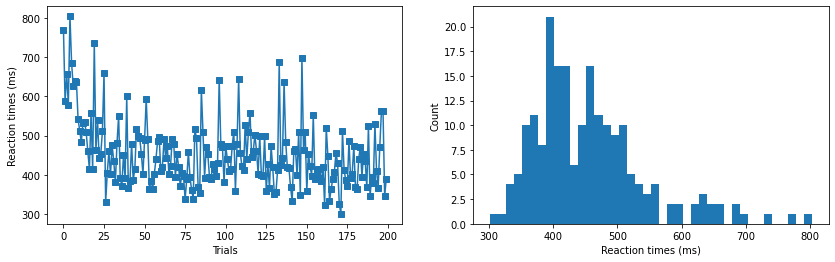

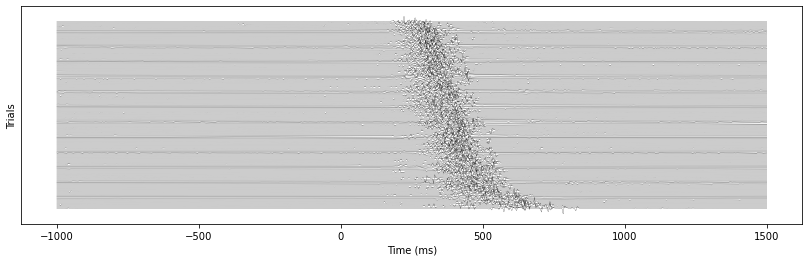

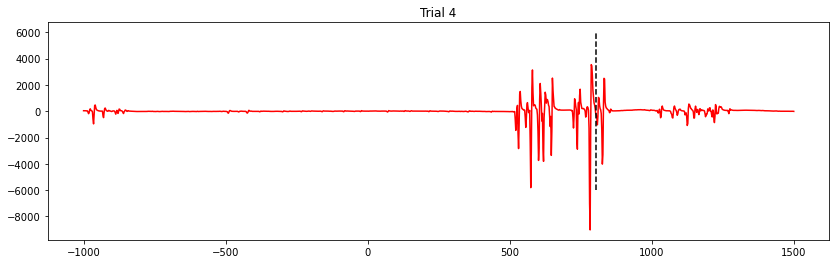

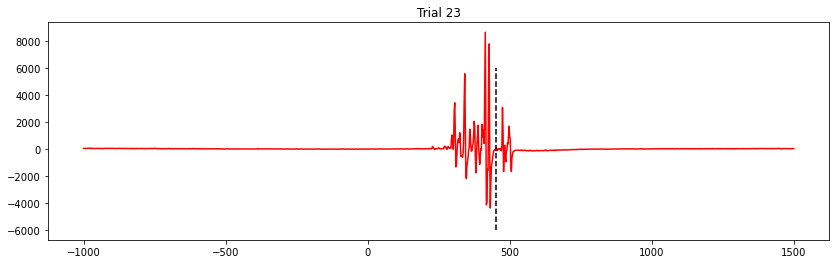

In [25]:
# load data
matdat = sio.loadmat('EMGRT.mat')
emg = matdat['emg']
rts = np.squeeze(matdat['rts'])
timevec = np.squeeze(matdat['timevec'])

N = len(rts)

# example trials
trials2plot = [ 4, 23 ]


### a few plots to get an idea of the data

plt.figure(figsize=(14,4))
# RTs (button presses)
plt.subplot(121)
plt.plot(rts,'s-')
plt.xlabel('Trials')
plt.ylabel('Reaction times (ms)')

# histogram of RTs
plt.subplot(122)
plt.hist(rts,40)
plt.xlabel('Reaction times (ms)')
plt.ylabel('Count')
plt.show()


# EMG time series, sorted by RTs
sidx = np.argsort(rts)[::-1]
plt.figure(figsize=(14,4))
for i in range(N):
    plt.plot(timevec,emg[sidx[i],:]+i*1500,'k',linewidth=.2)

plt.xlabel('Time (ms)')
plt.ylabel('Trials')
plt.yticks([], [])
plt.show()



# plt two example trials
for i in range(0,2):
    plt.figure(figsize=(14,4))
    
    # plot EMG trace
    plt.plot(timevec,emg[trials2plot[i],:],'r')
    
    # overlay button press time
    plt.plot([rts[trials2plot[i]], rts[trials2plot[i]]],[-6000, 6000],'k--')
    plt.title('Trial %d' %trials2plot[i])
    plt.show()


In [26]:
# detect EMG onsets

# define baseline time window for normalization
baseidx = [0,0]
baseidx[0] = np.argmin((timevec--500)**2)
baseidx[1] = np.argmin((timevec)**2)

# pick z-threshold
zthresh = 100

# initialize outputs
emgonsets = np.zeros(N)

for triali in range(0,N):
    
    # convert to energy via TKEO
    tkeo = emg[triali,1:-1]**2 - emg[triali,0:-2]*emg[triali,2:]
    # for convenience, make the TKEO the same length as the time vector
    tkeo = np.append(0,tkeo)
    tkeo = np.append(tkeo,0)
    
    # convert to zscore from pre-0 activity
    tkeo = ( tkeo-np.mean(tkeo[range(baseidx[0],baseidx[1])]) ) / np.std(tkeo[range(baseidx[0],baseidx[1])])
    
    # find first suprathreshold point
    tkeoThresh = tkeo>zthresh
    tkeoThresh[timevec<0] = 0
    tkeoPnts = np.squeeze( np.where(tkeoThresh) )
    
    # grab the first suprathreshold point
    emgonsets[triali] = timevec[ tkeoPnts[0]+1 ]


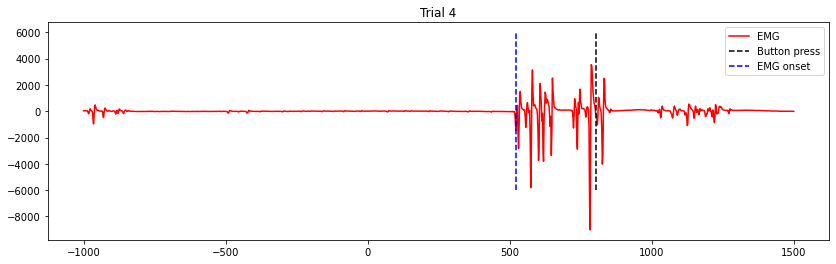

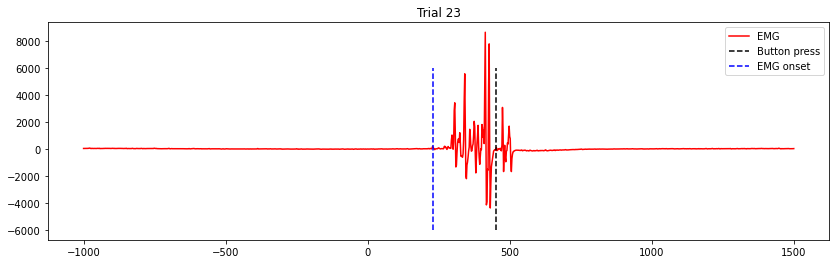

In [27]:
## more plots

# back to the EMG traces...
for i in range(2):
    plt.figure(figsize=(14,4))
    # plot EMG trace
    plt.plot(timevec,emg[trials2plot[i],:],'r',label='EMG')
    
    # overlay button press time
    plt.plot([rts[trials2plot[i]], rts[trials2plot[i]]],[-6000, 6000],'k--',label='Button press')
    plt.title('Trial %d' %trials2plot[i])
    
    # overlay EMG onset
    xpnt = emgonsets[trials2plot[i]]
    plt.plot([xpnt,xpnt],[-6000, 6000],'b--',label='EMG onset')
    
    plt.legend()
    plt.show()
    

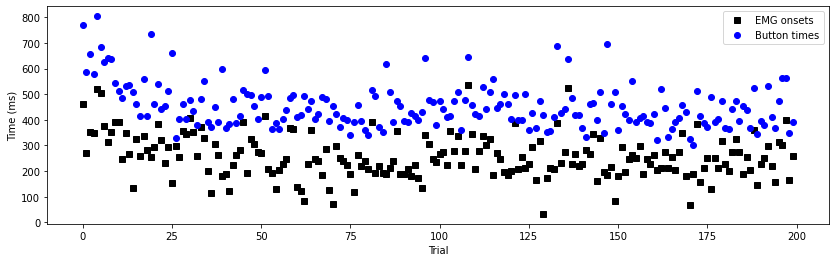

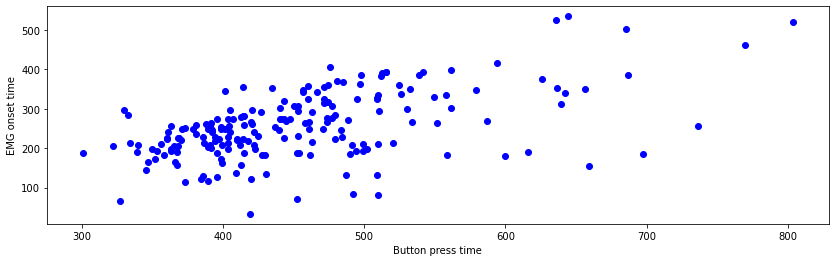

In [28]:
# plot onsets by RTs
plt.figure(figsize=(14,4))
plt.plot(emgonsets,'ks',label='EMG onsets')
plt.plot(rts,'bo',label='Button times')
plt.xlabel('Trial')
plt.ylabel('Time (ms)')
plt.legend()
plt.show()


plt.figure(figsize=(14,4))
plt.plot(rts,emgonsets,'bo')
plt.xlabel('Button press time')
plt.ylabel('EMG onset time')
plt.show()



---
# VIDEO: Full-width at half-maximum
---


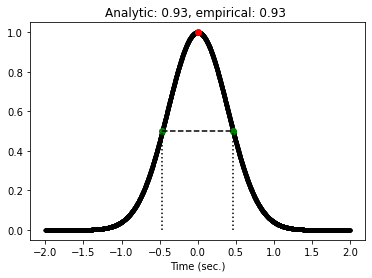

In [35]:
## Gaussian

# simulation parameters
srate = 1000
time  = np.arange(-2,2,1/srate)
fwhmA = .93 # seconds

gauswin = np.exp( -(4*np.log(2)*time**2) / fwhmA**2 )
gauswinNorm = gauswin / np.max(gauswin) #  normalize


# find the peak point
peakpnt = np.where( gauswin==np.max(gauswin) )[0][0]

# find 50% PREpeak point
# 50% is 0.5 because the signal is normalized to 1.
# There is no point exactly at 0.5 so we look for the closest point to 0.5
prepeak = np.argmin( (gauswinNorm[0:peakpnt] - 0.5)**2 )


# find 50% POSTpeak point
pstpeak = np.argmin( (gauswinNorm[peakpnt:] - 0.5)**2 )
pstpeak = pstpeak + peakpnt  # adjust


# compute empirical FWHM
fwhmE = time[pstpeak] - time[prepeak]


# plot normalized gaussian window
plt.plot(time,gauswinNorm,'k.')



# plot the points
plt.plot(time[peakpnt],gauswinNorm[peakpnt],'ro')
plt.plot(time[prepeak],gauswinNorm[prepeak],'go')
plt.plot(time[pstpeak],gauswinNorm[pstpeak],'go')

# plot line for reference
plt.plot([time[prepeak],time[pstpeak]],[gauswinNorm[prepeak],gauswinNorm[pstpeak]],'k--')
plt.plot([time[prepeak],time[prepeak]],[0, gauswinNorm[prepeak]],'k:')
plt.plot([time[pstpeak],time[pstpeak]],[0, gauswinNorm[prepeak]],'k:')
plt.xlabel('Time (sec.)')

plt.title('Analytic: %g, empirical: %g ' %(fwhmA,fwhmE))


plt.show()

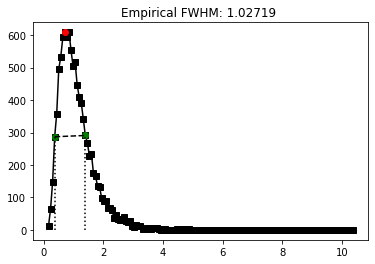

In [44]:
## example with asymmetric shape

# generate asymmetric distribution
fx,x = np.histogram(np.exp(0.5*np.random.randn(10000,1)),150)

# normalization necessary here!
fxNorm = fx/np.max(fx)

# plot the function
plt.plot(x[0:-1],fx,'ks-')


# find peak point
peakpnt = np.where( fxNorm==np.max(fxNorm) )[0][0]


# find 50% PREpeak point
prepeak = np.argmin((fxNorm[:peakpnt]-.5)**2)


# find 50% POSTpeak point
pstpeak = np.argmin((fxNorm[peakpnt:-1]-.5)**2)
pstpeak = pstpeak + peakpnt  # adjust


# compute empirical FWHM
fwhmE = x[pstpeak] - x[prepeak]



# plot the points
plt.plot(x[peakpnt],fx[peakpnt],'ro')
plt.plot(x[prepeak],fx[prepeak],'go')
plt.plot(x[pstpeak],fx[pstpeak],'go')


# plot line for reference
plt.plot([x[prepeak],x[pstpeak]],[fx[prepeak], fx[pstpeak]],'k--')
plt.plot([x[prepeak],x[prepeak]],[0, fx[prepeak]],'k:')
plt.plot([x[pstpeak],x[pstpeak]],[0, fx[prepeak]],'k:')

plt.title('Empirical FWHM: %g ' %fwhmE)
plt.show()

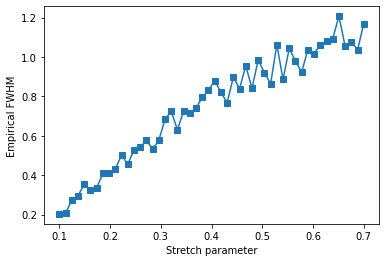

In [31]:
## an interesting aside...

# a range of standard deviations
sds = np.linspace(.1,.7,50)
fwhmE = np.zeros(len(sds))

for i in range(0,len(sds)):
    
    # new data
    fx,x = np.histogram(np.exp(sds[i]*np.random.randn(10000)),150)
    
    # normalization necessary here!
    fxNorm = fx/np.max(fx)
    
    # find peak point
    peakpnt = np.where( fxNorm==np.max(fxNorm) )[0][0]
    prepeak = np.argmin( (fxNorm[:peakpnt]-.5)**2 )
    pstpeak = np.argmin( (fxNorm[peakpnt:]-.5)**2 )
    pstpeak = pstpeak + peakpnt  # adjust
    
    # FWHM
    fwhmE[i] = x[pstpeak] - x[prepeak]


# plot
plt.plot(sds,fwhmE,'s-')
plt.xlabel('Stretch parameter')
plt.ylabel('Empirical FWHM')
plt.show()

In [45]:
sds

array([0.1       , 0.1122449 , 0.1244898 , 0.13673469, 0.14897959,
       0.16122449, 0.17346939, 0.18571429, 0.19795918, 0.21020408,
       0.22244898, 0.23469388, 0.24693878, 0.25918367, 0.27142857,
       0.28367347, 0.29591837, 0.30816327, 0.32040816, 0.33265306,
       0.34489796, 0.35714286, 0.36938776, 0.38163265, 0.39387755,
       0.40612245, 0.41836735, 0.43061224, 0.44285714, 0.45510204,
       0.46734694, 0.47959184, 0.49183673, 0.50408163, 0.51632653,
       0.52857143, 0.54081633, 0.55306122, 0.56530612, 0.57755102,
       0.58979592, 0.60204082, 0.61428571, 0.62653061, 0.63877551,
       0.65102041, 0.66326531, 0.6755102 , 0.6877551 , 0.7       ])

# code challenge

In [47]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

In [92]:
# generate asymmetric distribution
fx,x = np.histogram(np.exp(0.5*np.random.randn(10000,1)),150)

In [93]:
print(len(x), len(fx))

151 150


In [94]:
x = x[0:-1]

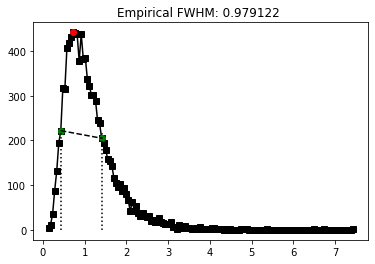

In [95]:
## example with asymmetric shape

# normalization necessary here!
fxNorm = fx/np.max(fx)

# plot the function
plt.plot(x,fx,'ks-')


# find peak point
peakpnt = np.where( fxNorm==np.max(fxNorm) )[0][0]


# find 50% PREpeak point
prepeak = np.argmin((fxNorm[:peakpnt]-.5)**2)


# find 50% POSTpeak point
pstpeak = np.argmin((fxNorm[peakpnt:-1]-.5)**2)
pstpeak = pstpeak + peakpnt  # adjust


# compute empirical FWHM
fwhmE = x[pstpeak] - x[prepeak]



# plot the points
plt.plot(x[peakpnt],fx[peakpnt],'ro')
plt.plot(x[prepeak],fx[prepeak],'go')
plt.plot(x[pstpeak],fx[pstpeak],'go')


# plot line for reference
plt.plot([x[prepeak],x[pstpeak]],[fx[prepeak], fx[pstpeak]],'k--')
plt.plot([x[prepeak],x[prepeak]],[0, fx[prepeak]],'k:')
plt.plot([x[pstpeak],x[pstpeak]],[0, fx[prepeak]],'k:')

plt.title('Empirical FWHM: %g ' %fwhmE)
plt.show()

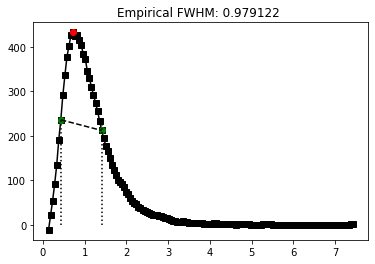

In [96]:
## example with asymmetric shape

# generate asymmetric distribution
fx = savgol_filter(fx, 5, 1)

# normalization necessary here!
fxNorm = fx/np.max(fx)

# plot the function
plt.plot(x,fx,'ks-')


# find peak point
peakpnt = np.where( fxNorm==np.max(fxNorm) )[0][0]


# find 50% PREpeak point
prepeak = np.argmin((fxNorm[:peakpnt]-.5)**2)


# find 50% POSTpeak point
pstpeak = np.argmin((fxNorm[peakpnt:-1]-.5)**2)
pstpeak = pstpeak + peakpnt  # adjust


# compute empirical FWHM
fwhmE = x[pstpeak] - x[prepeak]



# plot the points
plt.plot(x[peakpnt],fx[peakpnt],'ro')
plt.plot(x[prepeak],fx[prepeak],'go')
plt.plot(x[pstpeak],fx[pstpeak],'go')


# plot line for reference
plt.plot([x[prepeak],x[pstpeak]],[fx[prepeak], fx[pstpeak]],'k--')
plt.plot([x[prepeak],x[prepeak]],[0, fx[prepeak]],'k:')
plt.plot([x[pstpeak],x[pstpeak]],[0, fx[prepeak]],'k:')

plt.title('Empirical FWHM: %g ' %fwhmE)
plt.show()

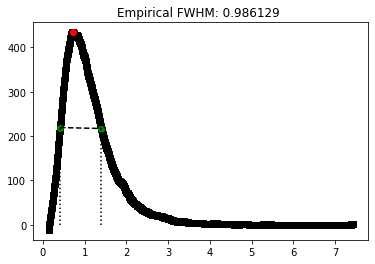

In [97]:
## example with asymmetric shape
interpolation_function = interp1d(x, fx, kind='cubic')
x = np.linspace(x[0], x[-1], 1510)
fx = interpolation_function(x)

# normalization necessary here!
fxNorm = fx/np.max(fx)

# plot the function
plt.plot(x,fx,'ks-')


# find peak point
peakpnt = np.where( fxNorm==np.max(fxNorm) )[0][0]


# find 50% PREpeak point
prepeak = np.argmin((fxNorm[:peakpnt]-.5)**2)


# find 50% POSTpeak point
pstpeak = np.argmin((fxNorm[peakpnt:-1]-.5)**2)
pstpeak = pstpeak + peakpnt  # adjust


# compute empirical FWHM
fwhmE = x[pstpeak] - x[prepeak]



# plot the points
plt.plot(x[peakpnt],fx[peakpnt],'ro')
plt.plot(x[prepeak],fx[prepeak],'go')
plt.plot(x[pstpeak],fx[pstpeak],'go')


# plot line for reference
plt.plot([x[prepeak],x[pstpeak]],[fx[prepeak], fx[pstpeak]],'k--')
plt.plot([x[prepeak],x[prepeak]],[0, fx[prepeak]],'k:')
plt.plot([x[pstpeak],x[pstpeak]],[0, fx[prepeak]],'k:')

plt.title('Empirical FWHM: %g ' %fwhmE)
plt.show()